In [402]:
import pandas as pd
import numpy as np

# Data Preprocessing

In [403]:
sales = pd.read_csv("./sales.csv")
sales.head(50)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [404]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [405]:
sales.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [406]:
sales["state_holiday"].unique()

array(['0', 'a', 'c', 'b'], dtype=object)

In [407]:
st_h0 = sales[sales["state_holiday"] == "0"]
st_h0.head(20)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [408]:
st_h0 = sales[sales["state_holiday"] == "a"]
st_h0.head(20)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
113,654516,836,5,2015-05-01,0,0,1,a,0,0
128,350557,552,1,2013-05-20,0,0,0,a,0,0
155,27878,803,5,2014-10-03,0,0,1,a,0,0
160,610321,570,4,2014-05-01,0,0,1,a,0,0
216,11690,676,3,2014-01-01,946,1,0,a,1,5755
224,54216,313,2,2013-01-01,0,0,0,a,1,0
316,126095,444,5,2014-10-31,0,0,0,a,1,0
317,280528,448,1,2015-05-25,0,0,0,a,0,0
357,386760,844,1,2015-05-25,0,0,0,a,0,0
462,476876,189,4,2014-05-29,0,0,0,a,0,0


In [409]:
st_h0 = sales[sales["state_holiday"] == "b"]
st_h0.head(20)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
344,364930,149,5,2015-04-03,0,0,1,b,1,0
374,491241,943,5,2015-04-03,0,0,1,b,1,0
520,261454,949,5,2013-03-29,0,0,1,b,1,0
598,139038,657,1,2013-04-01,0,0,0,b,1,0
660,644364,712,5,2014-04-18,0,0,1,b,1,0
731,29707,929,5,2015-04-03,0,0,1,b,1,0
908,56482,529,5,2013-03-29,0,0,1,b,1,0
1170,271898,444,5,2013-03-29,0,0,1,b,1,0
1302,517872,95,1,2013-04-01,0,0,0,b,1,0
1435,423714,39,1,2013-04-01,0,0,0,b,1,0


In [410]:
st_h0 = sales[(sales["state_holiday"] == "c") & (sales["sales"] != 0)]
st_h0.head(20)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
21258,684679,948,3,2013-12-25,1320,1,0,c,1,7138
25725,265806,733,4,2013-12-26,2785,1,0,c,1,15117
38679,698195,1081,4,2013-12-26,499,1,0,c,1,3178
43959,203180,769,5,2014-12-26,2834,1,0,c,1,13954
44411,690918,562,4,2014-12-25,2086,1,0,c,1,14166
54583,26985,494,4,2013-12-26,902,1,0,c,1,6127
57041,305304,1099,5,2014-12-26,585,1,0,c,1,3719
66724,330264,530,5,2014-12-26,738,1,0,c,1,4601
77547,607368,1097,4,2013-12-26,2199,1,0,c,1,11106
80476,691074,494,5,2014-12-26,963,1,0,c,1,6575


In [411]:
st_h0 = sales[(sales["state_holiday"] == "b") & (sales["sales"] != 0)]
st_h0.head(20)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
12917,160120,682,1,2013-04-01,1300,1,0,b,1,8423
21317,504852,1097,5,2013-03-29,2697,1,1,b,1,13069
21766,134355,562,1,2013-04-01,3547,1,0,b,1,20449
26088,108326,274,1,2013-04-01,1543,1,0,b,1,7577
28254,354460,769,5,2015-04-03,3054,1,1,b,1,14139
31680,154391,931,1,2014-04-21,198,1,0,b,1,1298
43827,278282,1097,1,2014-04-21,2810,1,0,b,1,12546
57706,464518,512,1,2013-04-01,1268,1,0,b,1,6137
57785,549224,682,5,2015-04-03,1478,1,1,b,1,9654
61327,47208,494,5,2014-04-18,1129,1,1,b,1,7247


In [412]:
st_h0 = sales[(sales["state_holiday"] == "a") & (sales["sales"] != 0)]
st_h0.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
216,11690,676,3,2014-01-01,946,1,0,a,1,5755
1529,105962,582,1,2014-06-09,493,1,0,a,0,2146
1984,582565,178,4,2013-05-30,962,1,1,a,0,10796
6382,567148,780,4,2015-06-04,1060,1,1,a,0,8646
6465,472005,178,4,2015-06-04,964,1,1,a,0,12155


In [413]:
# Defining the custom mapping
mapping = {'0': 0, 'c': 1, 'b': 2, 'a': 3}
# Applying the mapping to the 'state_holiday' column
sales['state_holiday'] = sales['state_holiday'].map(mapping)
# Verifying the encoding
print(sales['state_holiday'].unique())

[0 3 1 2]


# Feature Engineering

In [414]:
import pandas as pd

sales['date'] = pd.to_datetime(sales['date'])

# Extract the quarter from the date and create a new column
sales['quarter'] = sales['date'].dt.quarter

#drop date since we have quarter
sales = sales.drop("date", axis =1)
sales.head()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,quarter
0,425390,366,4,517,1,0,0,0,4422,2
1,291687,394,6,694,1,0,0,0,8297,2
2,411278,807,4,970,1,1,0,0,9729,3
3,664714,802,2,473,1,1,0,0,6513,2
4,540835,726,4,1068,1,1,0,0,10882,4


In [415]:
# drop the index column

sales = sales.drop("Unnamed: 0", axis =1)

In [416]:
sales.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,quarter
0,366,4,517,1,0,0,0,4422,2
1,394,6,694,1,0,0,0,8297,2
2,807,4,970,1,1,0,0,9729,3
3,802,2,473,1,1,0,0,6513,2
4,726,4,1068,1,1,0,0,10882,4


In [417]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             640840 non-null  int64
 1   day_of_week          640840 non-null  int64
 2   nb_customers_on_day  640840 non-null  int64
 3   open                 640840 non-null  int64
 4   promotion            640840 non-null  int64
 5   state_holiday        640840 non-null  int64
 6   school_holiday       640840 non-null  int64
 7   sales                640840 non-null  int64
 8   quarter              640840 non-null  int32
dtypes: int32(1), int64(8)
memory usage: 41.6 MB


In [418]:
sales = pd.get_dummies(sales, columns=["day_of_week"], prefix="weekday", drop_first=True)

sales.head()

,store_ID,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,quarter,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,366,517,1,0,0,0,4422,2,False,False,True,False,False,False
1,394,694,1,0,0,0,8297,2,False,False,False,False,True,False
2,807,970,1,1,0,0,9729,3,False,False,True,False,False,False
3,802,473,1,1,0,0,6513,2,True,False,False,False,False,False
4,726,1068,1,1,0,0,10882,4,False,False,True,False,False,False


In [419]:
# Step 1: Calculate the average spending per customer for each row
sales['avg_spend_per_customer'] = sales['sales'] / sales['nb_customers_on_day']

# Step 2: Calculate the average spending per customer for each store
avg_spend_per_store = sales.groupby('store_ID')['avg_spend_per_customer'].mean().reset_index()

# Rename column to make it more descriptive
avg_spend_per_store.rename(columns={'avg_spend_per_customer': 'avg_spend_per_customer_store_avg'}, inplace=True)

# Step 3: Merge the store-level average back into the original dataframe
sales = pd.merge(sales, avg_spend_per_store, on='store_ID', how='left')

# Step 4: Drop avg_spend_per_customer
sales = sales.drop(["avg_spend_per_customer"], axis =1)

# Display the updated dataframe with the new features
display(sales)

,store_ID,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,quarter,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,avg_spend_per_customer_store_avg
0,366,517,1,0,0,0,4422,2,False,False,True,False,False,False,10.152320
1,394,694,1,0,0,0,8297,2,False,False,False,False,True,False,12.556030
2,807,970,1,1,0,0,9729,3,False,False,True,False,False,False,9.946321
3,802,473,1,1,0,0,6513,2,True,False,False,False,False,False,12.884072
4,726,1068,1,1,0,0,10882,4,False,False,True,False,False,False,10.211092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,409,483,1,0,0,0,4553,4,False,False,False,False,True,False,10.055520
640836,97,987,1,1,0,0,12307,2,False,False,False,False,False,False,9.612592
640837,987,925,1,0,0,0,6800,3,False,False,False,False,False,False,7.790909
640838,1084,725,1,0,0,0,5344,2,False,False,True,False,False,False,7.722062


In [420]:
from scipy import stats

# Z-Score Scaling (Standard Scaling)
# Scaling 'nb_customers_on_day' and 'sales' using Z-score

sales['nb_customers_on_day'] = stats.zscore(sales['nb_customers_on_day'])
sales['sales'] = stats.zscore(sales['sales'])
sales['avg_spend_per_customer_store_avg'] = stats.zscore(sales['avg_spend_per_customer_store_avg'])

# Display the dataframe with scaled columns
display(sales.head())

,store_ID,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,quarter,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,avg_spend_per_customer_store_avg
0,366,-0.250808,1,0,0,0,-0.351948,2,False,False,True,False,False,False,0.329925
1,394,0.130580,1,0,0,0,0.654197,2,False,False,False,False,True,False,1.562925
2,807,0.725287,1,1,0,0,1.026016,3,False,False,True,False,False,False,0.224256
3,802,-0.345617,1,1,0,0,0.190981,2,True,False,False,False,False,False,1.731197
4,726,0.936451,1,1,0,0,1.325393,4,False,False,True,False,False,False,0.360072


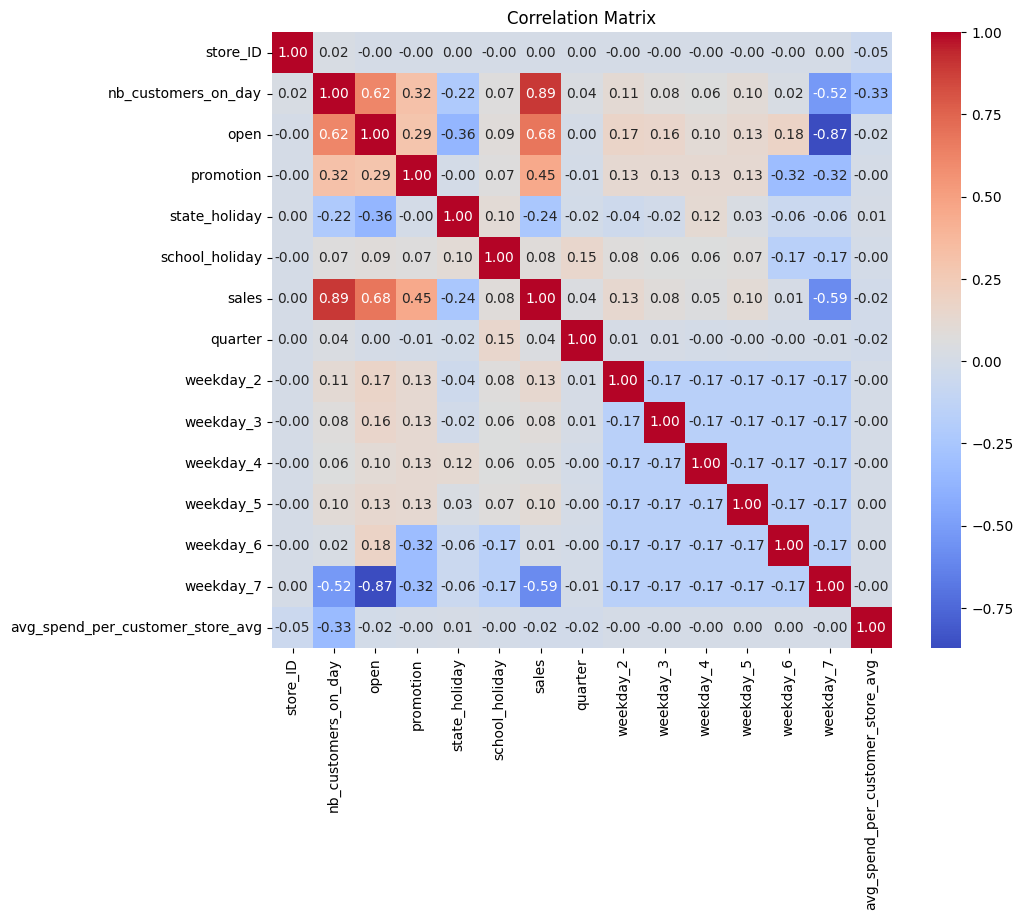

In [421]:

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
correlation_matrix = sales.corr()

# Step 2: Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.title('Correlation Matrix')
plt.show()

# Model selection

In [424]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'sales' is your DataFrame and 'sales' is the target column
X = sales.drop(columns=['sales'])  # Features
y = sales['sales']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [425]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")

Linear Regression - MSE: 0.08248692349309526, R2: 0.9172278056184663


## Decision Trees

In [426]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - MSE: {mse_tree}, R2: {r2_tree}")

Decision Tree - MSE: 0.026853377646105448, R2: 0.9730537532472013


## Random Forest

In [429]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
forest_model.fit(X_train, y_train)

# Predict on test data
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest - MSE: {mse_forest}, R2: {r2_forest}")

Random Forest - MSE: 0.015283469223850415, R2: 0.9846636747759585


## XGBoost

In [430]:
import xgboost as xgb

# Initialize XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluate the model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f"XGBoost - MSE: {mse_xgboost}, R2: {r2_xgboost}")

XGBoost - MSE: 0.016117009533110346, R2: 0.9838272517699692


## Neural Network

In [431]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a simple neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression (single output)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predict on test data
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MSE: {mse_nn}, R2: {r2_nn}")

c:\Users\dusan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4006/4006 ━━━━━━━━━━━━━━━━━━━━ 2s 546us/step
Neural Network - MSE: 0.01891992557734211, R2: 0.9810146421850368
